In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/claims_data.csv')

In [9]:
df.head(3)

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.90,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.77,3008,1,no,southeast,yes,1725.5523
2,28,male,33.00,3009,3,no,southeast,no,0.0000


In [6]:
df.isnull().sum()

age                0
sex                0
bmi                0
steps              0
children           0
smoker             0
region             0
insurance_claim    0
claim_amount       0
dtype: int64

In [7]:
df.describe()

,age,bmi,steps,children,claim_amount
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,5328.623318,1.094918,9611.312287
std,14.049960,6.098187,2453.643236,1.205493,13450.624483
min,18.000000,15.960000,3000.000000,0.000000,0.000000
25%,27.000000,26.296250,3008.000000,0.000000,0.000000
50%,39.000000,30.400000,4007.000000,1.000000,2748.484475
75%,51.000000,34.693750,8004.000000,2.000000,13045.979513
max,64.000000,53.130000,10010.000000,5.000000,63770.428010


In [13]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns # to analyse description of categorical data
df[cat_cols].describe()

,sex,smoker,region,insurance_claim
count,1338,1338,1338,1338
unique,2,2,4,2
top,male,no,southeast,yes
freq,676,1064,364,783


In [14]:
df['sex'].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [28]:
def plot_cat_counts(col):
    plt.figure(figsize=(3, 2))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.savefig(f'distribution of {col}')
    plt.show()

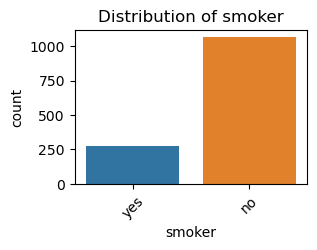

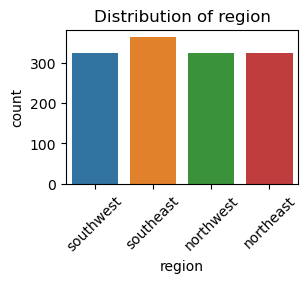

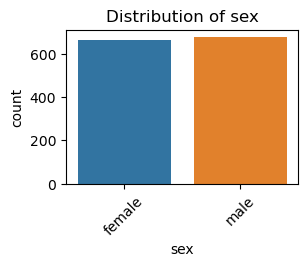

In [31]:
plot_cat_counts('smoker')
plot_cat_counts('region')
plot_cat_counts('sex')

In [35]:
df.skew(numeric_only=True)

age             0.055673
bmi             0.284047
steps           0.662112
children        0.938380
claim_amount    1.580456
dtype: float64

In [36]:
df.kurtosis(numeric_only=True)

age            -1.245088
bmi            -0.050732
steps          -1.149449
children        0.202454
claim_amount    1.596023
dtype: float64

In [ ]:
Univariate analysis

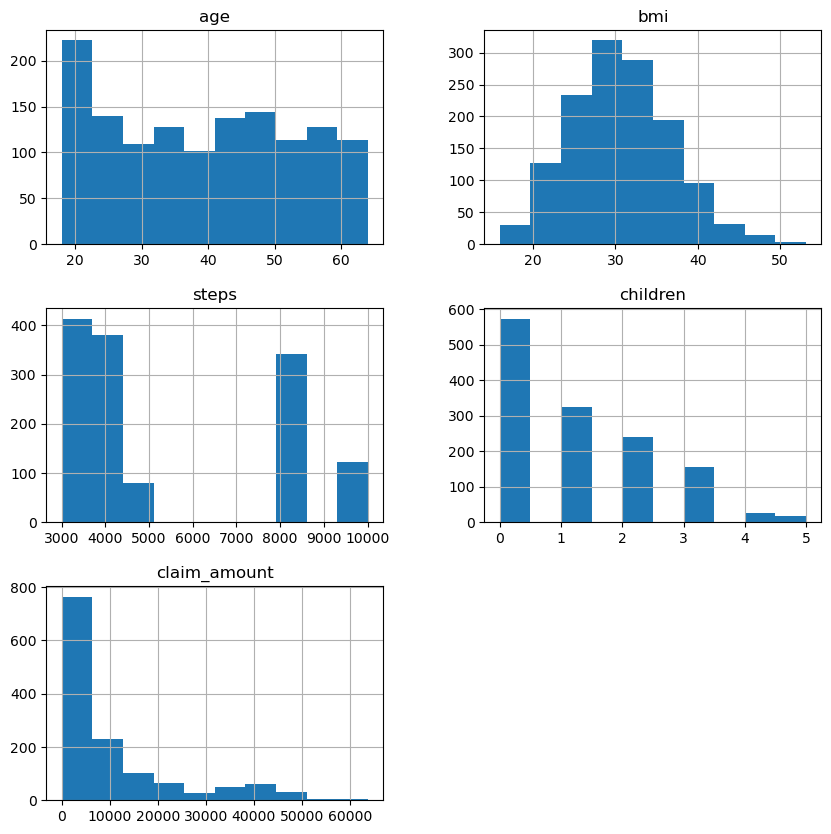

In [37]:
features = ['age', 'bmi', 'steps', 'children', 'claim_amount'] # create a list of all numerical features
df[features].hist(figsize=(10,10));

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

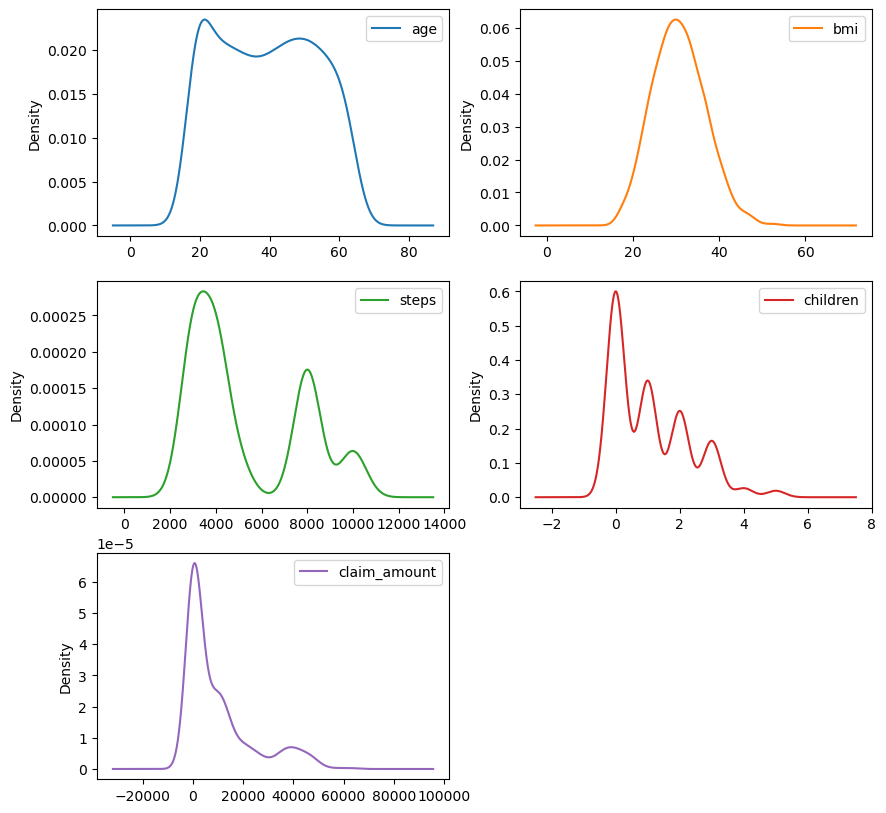

In [44]:
df[features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(10, 10))

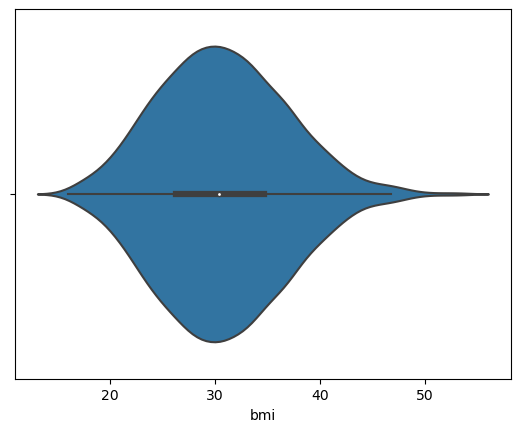

In [46]:
sns.violinplot(x='bmi', data=df);

In [ ]:
Multivariate Analysis

In [50]:
df.corr(numeric_only = True)

,age,bmi,steps,children,claim_amount
age,1.000000,0.109272,-0.167957,0.042469,0.218863
bmi,0.109272,1.000000,-0.681149,0.012759,0.293001
steps,-0.167957,-0.681149,1.000000,0.055346,-0.346876
children,0.042469,0.012759,0.055346,1.000000,-0.108556
claim_amount,0.218863,0.293001,-0.346876,-0.108556,1.000000


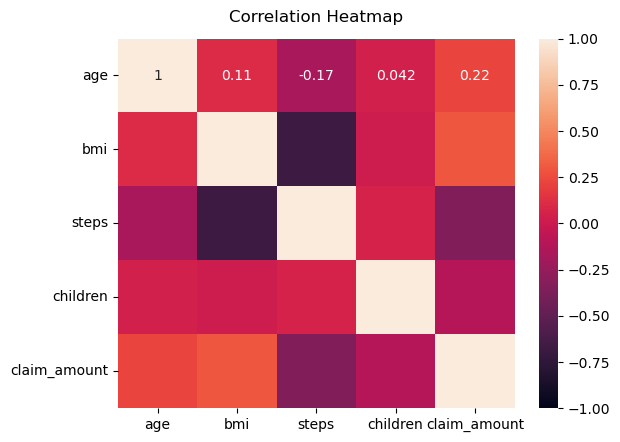

In [52]:
heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

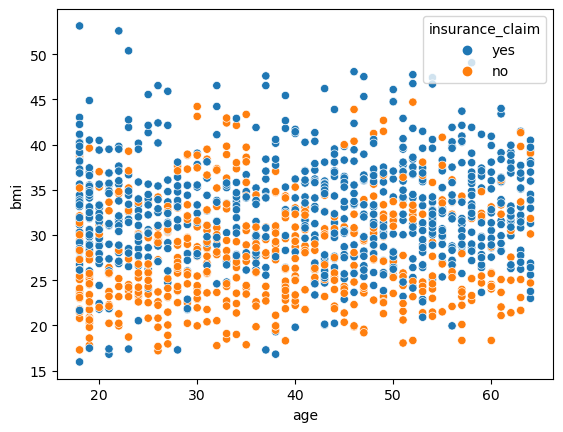

In [55]:
sns.scatterplot(x='age',y='bmi' ,hue='insurance_claim', data=df);

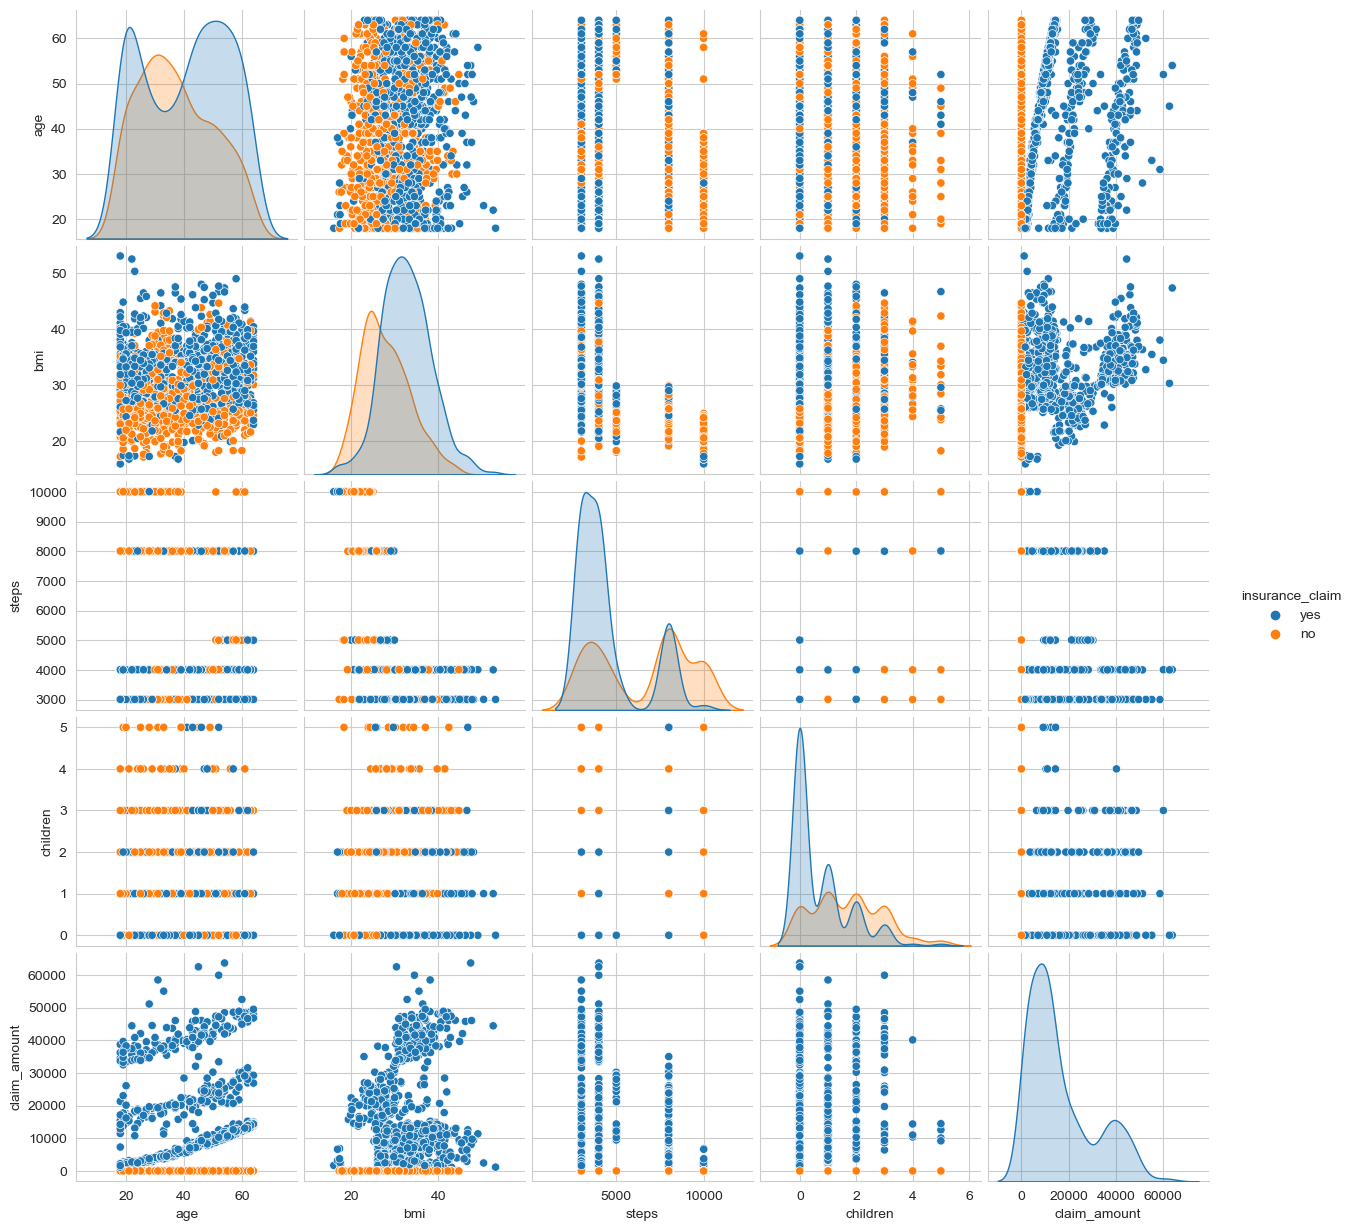

In [56]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="insurance_claim");
plt.show();

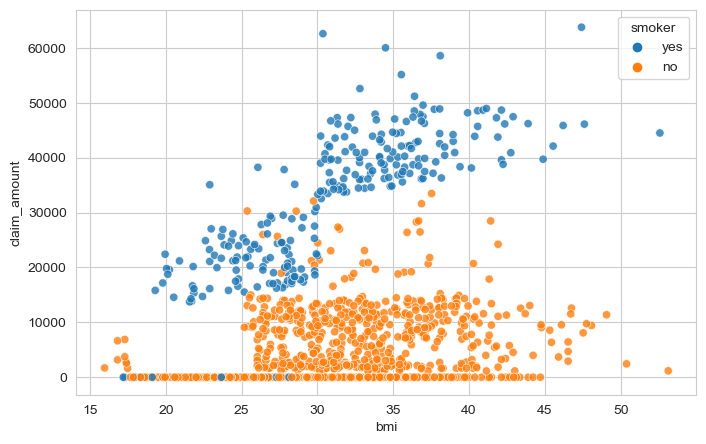

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="bmi",
                y="claim_amount",
                sizes=(20,100),
                alpha=0.8,
                hue="smoker",
                data=df);